### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import time
import winsound

In [2]:

duration = 1000  # milliseconds
freq = 440  # Hz

In [3]:
###Dados de Entrada###
r=0.03
delta=0.038
sigma=0.3
tau=3
Po=50
rho=0.5





In [4]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish,Feather,Head
CF,0.3,0.25,0.20
I_w,80.0,60.00,80.00
q,0.2,0.14,0.18
B,620.0,400.00,950.00
Owner,0.0,0.00,1.00


In [5]:
case.iloc[2,:]=case.iloc[2,:]*np.exp(-2*delta)
case.head()

Type,DogFish,Feather,Head
CF,0.300000,0.250000,0.200000
I_w,80.000000,60.000000,80.000000
q,0.185363,0.129754,0.166827
B,620.000000,400.000000,950.000000
Owner,0.000000,0.000000,1.000000


In [6]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [7]:
###############Bloco com DogFish e  Head ####################3
#Será chamado de b1, mas é um bloco fictício



In [8]:
case_b1=pd.read_csv("Case_Guy_b_Fantasia.csv", sep=';')
case_b1.set_index('Type', inplace=True)
case_b1=case_b1.astype(float).T
case_b1

Type,DogFish,Head
CF,0.3,0.20
I_w,80.0,80.00
q,0.2,0.18
B,620.0,950.00
Owner,1.0,1.00


In [9]:
case_b1.iloc[2,:]=case_b1.iloc[2,:]*np.exp(-2*delta)

In [10]:
case_b1.head()

Type,DogFish,Head
CF,0.300000,0.200000
I_w,80.000000,80.000000
q,0.185363,0.166827
B,620.000000,950.000000
Owner,1.000000,1.000000


In [11]:
case_corr_b1=pd.read_csv("Case_Guy_corr_b_Fantasia.csv", sep=';')
case_corr_b1.set_index('Type', inplace=True)
case_corr_b1


,DogFish,Head
Type,,
DogFish,1.0,0.5
Head,0.5,1.0


In [12]:
###############Bloco 2##########################


In [13]:
def V(P,case,w):
    valor=P*case.iloc[2,k[w]]*case.iloc[3,k[w]]
    return valor

    
    

In [14]:
def I(case,w):
    invest=case.iloc[3,k[w]]*5.35 + 650
    invest=invest*np.exp(-2*r)
    return invest

In [15]:
def VME(P,case,i):
    VPL=P*case.iloc[2,i]*case.iloc[3,i] - (case.iloc[3,i]*5.35 + 650)*np.exp(-2*r)
    vme=case.iloc[0,i]*VPL - case.iloc[1,i]
    return vme

In [16]:
print(VME(50,case_b1,0))
print(VME(50,case_b1,1))

523.0841727818364
425.1226754622021


In [17]:
print(VME(50,case,0))
print(VME(50,case,1))
print(VME(50,case,2))


523.0841727818364
-68.10941758344597
425.1226754622021


In [18]:
VME(50,case,0)+VME(50,case,1) + VME(50,case,2)

880.0974306605925

In [19]:
VME(50,case,0)+VME(50,case,1)

454.9747551983904

In [20]:
#################Formalizacao caso - correto
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
    
    m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
    
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
    print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    


###Fornece o melhor portfolio seq_winner e o valor do porfolio winner

winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

seq_sec=list(seq)
num=np.argmax(fold)
fold_sec=list(fold)
fold_sec.remove(np.amax(fold))
del seq_sec[num]
    
second=np.amax(fold_sec)
Seq_sec=seq_sec[np.argmax(fold_sec)]
second=np.maximum(0,second)
if second==0:
    Seq_sec='W'

diff=winner-second

    
    
            

    #print(fold)
    #print(m)
print('melhor:',Seq_winner, '$melhor:', winner,'segundo:',Seq_sec,'$Segundo:',second,'diff:',diff, fold)
#print(fold)
    
    
    
print(np.argmax(fold))    
    
    

[True, True, True, True]
[True, True, True, True]
[[30.         64.68626967 72.71514427]
 [        nan  7.99159871  9.95020999]
 [        nan         nan 58.53064256]
 [        nan         nan  2.42303146]]
[True, True, True, True]
[True, True, True, True]
[[30.         50.55050463 93.04895105]
 [        nan  6.90692659 35.69208386]
 [        nan         nan 67.72236566]
 [        nan         nan  3.5599476 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         77.6235236  74.62763853]
 [        nan 14.12549213 16.26983941]
 [        nan         nan 35.74712621]
 [        nan         nan  1.2741104 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         61.56921938 94.08695317]
 [        nan  6.14359354 51.24777763]
 [        nan         nan 82.19061805]
 [        nan         nan  9.67012799]]
[True, True, True, True]
[True, True, True, True]
[[20.         75.82575695 91.22689345]
 [        nan 18.54356076 32.21627957]
 [        nan         nan 52.8885573 ]
 [   

In [21]:
seq,seq_sec

([(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)],
 [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 1, 0)])

In [22]:
fold,fold_sec


([892.2080506034492,
  948.2068482440385,
  910.8969007581193,
  880.0974306605925,
  948.2068482440386,
  880.0974306605925],
 [892.2080506034492,
  948.2068482440385,
  910.8969007581193,
  880.0974306605925,
  880.0974306605925])

In [23]:
num

4

In [24]:
np.argmax(fold)

4

In [25]:
fold

[892.2080506034492,
 948.2068482440385,
 910.8969007581193,
 880.0974306605925,
 948.2068482440386,
 880.0974306605925]

In [26]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
                #print(pi[g,l])
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'
    
    
    seq_sec=list(seq)
    num=np.argmax(fold)
    fold_sec=list(fold)
    fold_sec.remove(np.amax(fold))
    del seq_sec[num]
    
    second=np.amax(fold_sec)
    Seq_sec=seq_sec[np.argmax(fold_sec)]
    second=np.maximum(0,second)
    if second==0:
        Seq_sec='W'
    diff=winner-second



        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,Seq_sec, second, diff,fold]







In [27]:
cart=carteira(case,case_corr,50)
print(cart)

[(2, 0, 1), 948.2068482440386, (0, 2, 1), 948.2068482440385, 1.1368683772161603e-13, [892.2080506034492, 948.2068482440385, 910.8969007581193, 880.0974306605925, 948.2068482440386, 880.0974306605925]]


In [28]:
cart=carteira(case_b1,case_corr_b1,50)
print(cart)

[(1, 0), 948.2068482440386, (0, 1), 948.2068482440385, 1.1368683772161603e-13, [948.2068482440385, 948.2068482440386]]


In [29]:
def VME_t(P,case,CF,i):
    VPL=P*case.iloc[2,i]*case.iloc[3,i] - (case.iloc[3,i]*5.35 + 650)*np.exp(-2*r)
    vme=CF*VPL - case.iloc[1,i]
    return vme

In [30]:
VME_t(50,case_b1,0.2,1)

425.1226754622021

In [31]:
for i in range(200):
    print(i, carteira(case,case_corr,i)[0],carteira(case,case_corr,i)[1],carteira(case,case_corr,i)[3],carteira(case,case_corr,i)[2], carteira(case,case_corr,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 (0, 1, 2) 5.9207295217013325 5.9207295217013325 (0, 2, 1) 0.0
36 (0, 2, 1) 62.92730908945186 40.39829240571029 (0, 1, 2) 22.529016683741567
37 (0, 2, 1) 121.43944879555607 87.93604531562019 (2, 0, 1) 33.50340347993588
38 (0, 2, 1) 179.95158850166047 154.11072246396014 (2, 0, 1) 25.840866037700323
39 (0, 2, 1) 238.4637282077651 220.285399612

140 (0, 1, 2) 8003.6067942760055 8003.6067942760055 (0, 2, 1) 0.0
141 (0, 1, 2) 8082.756898316178 8082.756898316178 (1, 0, 2) 0.0
142 (0, 1, 2) 8161.907002356348 8161.907002356347 (0, 2, 1) 9.094947017729282e-13
143 (0, 1, 2) 8241.05710639652 8241.05710639652 (1, 0, 2) 0.0
144 (2, 0, 1) 8320.207210436693 8320.20721043669 (0, 1, 2) 1.8189894035458565e-12
145 (0, 1, 2) 8399.357314476862 8399.357314476862 (0, 2, 1) 0.0
146 (0, 1, 2) 8478.507418517032 8478.507418517032 (0, 2, 1) 0.0
147 (0, 1, 2) 8557.657522557205 8557.657522557205 (2, 0, 1) 0.0
148 (0, 1, 2) 8636.807626597376 8636.807626597376 (0, 2, 1) 0.0
149 (0, 1, 2) 8715.957730637547 8715.957730637547 (0, 2, 1) 0.0
150 (0, 1, 2) 8795.107834677718 8795.107834677718 (0, 2, 1) 0.0
151 (2, 0, 1) 8874.25793871789 8874.25793871789 (2, 1, 0) 0.0
152 (2, 1, 0) 8953.408042758061 8953.40804275806 (0, 1, 2) 1.8189894035458565e-12
153 (0, 1, 2) 9032.558146798232 9032.558146798232 (2, 0, 1) 0.0
154 (2, 0, 1) 9111.708250838405 9111.708250838403 (0

In [32]:
def diffinexpcart(case,case_corr,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=2*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira(case,case_corr,Pt[i])
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira(case,case_corr,Pt[i])
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira(case,case_corr,Pt[i])
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j-1])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid+1],dframe,T,Pt,F,Gatilho]



In [72]:
accur=0.05
start=time.time()
solucao=diffinexpcart(case,case_corr,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


KeyboardInterrupt: 

In [ ]:
solucao[0]

In [ ]:
solucao[1]

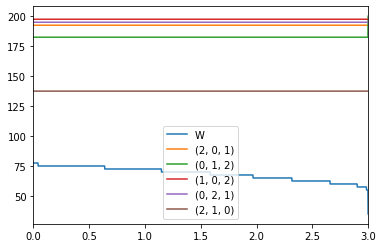

In [32]:
solucao[1].plot()

In [33]:
solucao[5].shape

(1730, 81)

In [34]:
ima=solucao[5]

In [35]:
ima

array([['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ...,
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (1, 2, 0)]],
      dtype=object)

In [36]:
ima[1000,80]==(0,1,2)

True

In [37]:
solucao[4]

array([[0.00000000e+00, 2.92828906e-04, 1.83311311e-02, ...,
        1.33989000e+04, 1.36124000e+04, 1.36124000e+04],
       [0.00000000e+00, 2.91590160e-04, 1.82674028e-02, ...,
        1.33989000e+04, 1.36124000e+04, 1.36124000e+04],
       [0.00000000e+00, 2.90355679e-04, 1.82038426e-02, ...,
        1.33989000e+04, 1.36124000e+04, 1.36124000e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33989000e+04, 1.36124000e+04, 1.36124000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33989000e+04, 1.36124000e+04, 1.36124000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33989000e+04, 1.36124000e+04, 1.38259000e+04]])

In [38]:
ima.shape

(1730, 81)

In [39]:
w, h = ima.shape[0], ima.shape[1]
data = np.zeros((h,w, 3), dtype=np.uint8)
d1=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            data[ima.shape[1]-j-1,i]=[0,0,0]
            d1[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(0,2,1):
            data[ima.shape[1]-j-1,i]=[255,100,0]
            d1[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=3
        elif ima[i,j]==(1,2,0):
            data[ima.shape[1]-j-1,i]=[255,255,0]
            d1[ima.shape[1]-j-1,i]=4
        elif ima[i,j]==(2,1,0):
            data[ima.shape[1]-j-1,i]=[0,0,255]
            d1[ima.shape[1]-j-1,i]=5
        elif ima[i,j]==(2,0,1):
            data[ima.shape[1]-j-1,i]=[100,0,255]
            d1[ima.shape[1]-j-1,i]=6
        
        

In [40]:
d1frame=pd.DataFrame(d1)
d1frame.columns=solucao[2]
d1frame.index=solucao[3][::-1]

In [41]:
d1frame.head()

,0.000000,0.001735,0.003470,0.005205,0.006940,0.008676,0.010411,0.012146,0.013881,0.015616,...,2.984384,2.986119,2.987854,2.989589,2.991324,2.993060,2.994795,2.996530,2.998265,3.000000
200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
197.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
195.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
192.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
190.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


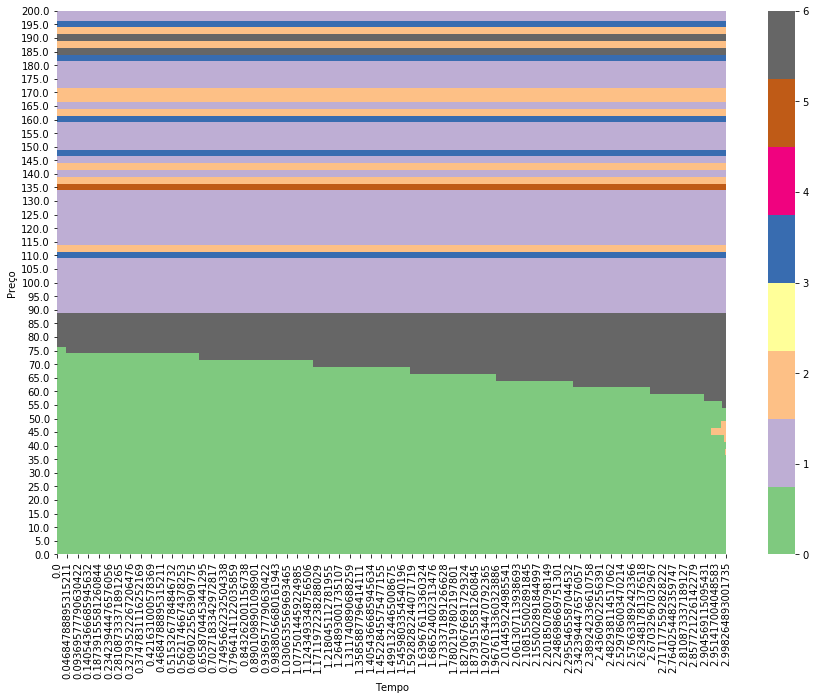

In [56]:

fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
ax=sns.heatmap(d1frame, cmap="Accent")
#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([3/8,1,2,4*3/4 +3/8,5*3/4 +3/8,6*3/4 +3/8,6 - 3/8])
#colorbar.set_ticklabels(['W', '0-1-2', '0-2-1','1-0-2','1-2-0','2-1-0','2-0-1'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [86]:
######################################
###########Bloco b1#####################

In [33]:
case_corr_b1

,DogFish,Head
Type,,
DogFish,1.0,0.5
Head,0.5,1.0


In [34]:
case_b1

Type,DogFish,Head
CF,0.300000,0.200000
I_w,80.000000,80.000000
q,0.185363,0.166827
B,620.000000,950.000000
Owner,1.000000,1.000000


In [54]:
start=time.time()
#accur=0.05
accur=0.005
solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)



minutos- 139.68800817330677


In [55]:
solucao_b1[0]

1092.9842919005337

In [56]:
solucao_b1[1]

,W,"(0, 1)","(1, 0)"
0.000000,71.50,99.0,99.25
0.000069,71.50,99.0,99.25
0.000139,71.50,99.0,99.25
0.000208,71.50,99.0,99.25
0.000278,71.50,99.0,99.25
...,...,...,...
2.999722,42.00,99.0,99.25
2.999792,42.00,99.0,99.25
2.999861,42.00,99.0,99.25
2.999931,41.75,99.0,99.25


In [57]:
print('o gatilho é:',solucao_b1[1].iloc[0,0])

o gatilho é: 71.5


In [58]:
print('o portfólio vale:', solucao_b1[0])

o portfólio vale: 1092.9842919005337


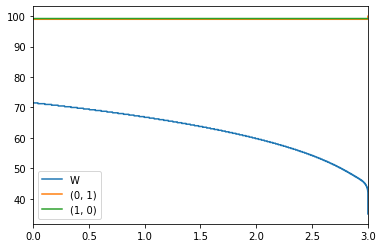

In [59]:
solucao_b1[1].plot()

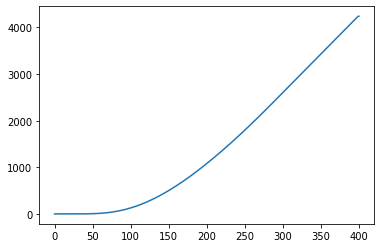

In [60]:
plt.plot(solucao_b1[4][0,:])

In [61]:
winsound.Beep(freq,duration)


In [62]:
#####################Exportar Solucao###################Tempo presente

In [63]:
solucao_b1[4][0,0]

0.0

In [64]:
solucao_b1[3].shape

(401,)

In [65]:
solucao_b1[4].shape

(43202, 401)

In [66]:
ima=solucao_b1[5]

In [67]:
w, h = ima.shape[0], ima.shape[1]
#data = np.zeros((h,w, 3), dtype=np.uint8)
d2=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            #data[ima.shape[1]-j-1,i]=[0,0,0]
            d2[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1):
            #data[ima.shape[1]-j-1,i]=[255,0,0]
            d2[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(1,0):
            #data[ima.shape[1]-j-1,i]=[255,100,0]
            d2[ima.shape[1]-j-1,i]=2
        

In [68]:
d2frame=pd.DataFrame(d2)
d2frame.columns=solucao_b1[2]
d2frame.index=solucao_b1[3][::-1]

In [69]:
np.where(d2frame.index==100)

(array([0], dtype=int64),)

In [70]:
d2frame

,0.000000,0.000069,0.000139,0.000208,0.000278,0.000347,0.000417,0.000486,0.000556,0.000625,...,2.999375,2.999444,2.999514,2.999583,2.999653,2.999722,2.999792,2.999861,2.999931,3.000000
100.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
99.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99.00,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#d2frame.to_csv('d2frame.csv')

In [72]:
#d2frame=pd.read_csv('d2frame.csv')

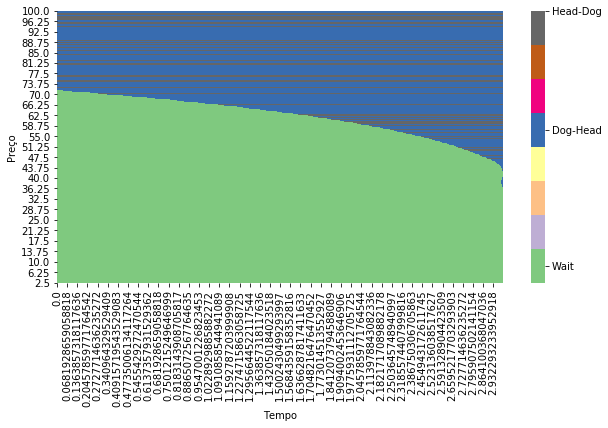

In [73]:
fig, ax=plt.subplots(figsize=(10,5))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
#cmap=sns.set_palette("hls",3)
ax=sns.heatmap(d2frame, cmap='Accent', vmax=2, vmin=0)
#ax=sns.set_palette("hls",3)

#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1/8, 1+ 1/8,2])
colorbar.set_ticklabels(['Wait', 'Dog-Head', 'Head-Dog'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');
#ax.set_ylim(top=150);

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [74]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4])

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 (0, 1) 5.9207295217013325 0.0 W 5.9207295217013325
36 (0, 1) 62.92730908945186 26.22502014221849 (1, 0) 36.70228894723337
37 (0, 1) 121.43944879555607 87.93604531562019 (1, 0) 33.50340347993588
38 (0, 1) 179.95158850166047 154.11072246396014 (1, 0) 25.840866037700323
39 (0, 1) 238.4637282077651 220.28539961230032 (1, 0) 18.178328595464762
4

In [75]:
winsound.Beep(freq, duration)

In [ ]:
#######################################
####Exportar
#########

In [195]:
np.savetxt('Opcao_portf_h_dog_expandido.txt',solucao_b1[4][0,:])

In [194]:
np.savetxt('Preco_portf_h_dog_expandido.txt',solucao_b1[3])

In [55]:
#################################
#######Individuais  e B2############

In [287]:
################################################33
###########Modelo de Competicao#################


In [466]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case.Owner=case.Owner.astype(int)
case=case.astype(float).T
case

Type,Payara,Pluma,LongTail
CF,0.30,0.25,0.20
I_w,80.00,60.00,80.00
q,0.15,0.14,0.15
B,450.00,400.00,500.00
Owner,1.00,1.00,0.00


In [467]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,Payara,Pluma,LongTail
Type,,,
Payara,1.0,0.6,0.5
Pluma,0.6,1.0,0.6
LongTail,0.5,0.6,1.0


In [ ]:
#############################################

In [465]:
#################Formalizacao caso - com competição   

####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=1  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(1,m[0,0],pi[0,0])
    
    elif sinal==0:
        print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
    else:
        print(2)
        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(2,m[0,0],pi[0,0])
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

melhor portfolio é: (0, 1) e o valor é: 160.74677831484792 [160.74677831484792, 0.0]


In [197]:
print('up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]')

up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]


In [202]:
print('down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]')

down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]


In [207]:
print('01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]')

01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [435]:
def carteira_estra(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    sinal=1  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

    FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]
    
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        else:
            #print(2)
            m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[5,k[0]]+650)) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [436]:
carteira_estra(case,case_corr,50,1)

[(0, 1), 160.74677831484792, [160.74677831484792, 0.0]]

In [285]:
diffinexpcart(case,case_corr,50,r,delta,sigma,tau)[0]

14.011472926007304

In [286]:
def diffinexpcartestra(case,case_corr,sinal,P,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira_estra(case,case_ABC_corr,Pt[i],sinal)
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira_estra(case,case_corr,Pt[i],sinal)
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira_estra(case,case_corr,Pt[i],sinal)
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F]



In [321]:
def diffinexp(case,V,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.1  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaV=V*accur
    
    # M são as divisões do grid em V
    #forcei a barra- coloque 3 vezes a V de perpetuidade. Estava 1,1 
    Vmax=4*V
    M= int(Vmax/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    VGrid=int(V/deltaV) #Ponto do grid onde esta V_0. 
    deltat= (deltaV**2)/((sigma**2)*(Vmax**2)) #Convergência: Critério do peso central >=0. Vmax=3I ><1.1Gatilho_perp
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    #Vetor Vt
    Vt=np.zeros(M+1)
    Gatilho=np.zeros(N+1)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Vt[i]= i*deltaV
        #F[N,i]=np.maximum(0,Vt[i]-I)
        F[N,i]=np.maximum(0,caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0])
    Gatilho[N]=caseR.iloc[0,0]*(Vt[i]/50)*case.iloc[5,0] + case.iloc[1,0]
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pd = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pd*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]< caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0] and F[j,i-1]>caseR.iloc[0,0]*(Vt[i-1]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i-1]/50)*case.iloc[5,0]) -case.iloc[1,0]:
                Gatilho[j]=(Vt[i]+Vt[i-1])/2
            
            F[j,i]=np.maximum(caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0], F[j,i])  #opção americana
        
        
        F[j,0]=0
        F[j,M]=caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0]
        
        
    T=np.linspace(0,tau,num=len(Gatilho))
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,VGrid],Gatilho,T,Vt,F]



In [301]:
start=time.time()

r2=diffinexpcartestra(case,case_corr,2,50,r,delta,sigma,tau)
print(r2[0])

14.011472926007304


In [302]:
r1=diffinexpcartestra(case,case_corr,1,50,r,delta,sigma,tau)

In [303]:
r0=diffinexpcartestra(case,case_corr,0,50,r,delta,sigma,tau)

In [304]:
FC_viz*r1[0] + (1-FC_viz)*r0[0]

23.248679387511107

In [305]:
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 34.52971352338791


In [330]:
start=time.time()
rabc=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.226902592182159


In [325]:
caseR=case[case.columns[case.loc['Owner']==0]]
caseR

Type,R
CF,0.20
I_w,50.00
P,50.00
q,0.12
B,700.00
I_d,4000.00
Owner,0.00


In [320]:


print('VME-R',caseR.iloc[0,0]*(caseR.iloc[2,0]*caseR.iloc[3,0]*caseR.iloc[4,0] - (caseR.iloc[2,0]/50)*caseR.iloc[5,0]) -caseR.iloc[1,0])


VME-R -10.0


In [323]:
rr=diffinexp(caseR,50,r,delta,sigma,tau)

In [336]:
####
print('Portfolio sem considerar o vizinho:', r2[0])
print('Portfolio considerando o vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0])
print('Diferença - Valor adicionado pela informação do vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0] - r2[0] )
print('Portfolio do vizinho:', rr[0])
print('Portfolio incorporando o ativo do vizinho:',rabc[0])
print('Diferença - Incorporar ou não o ativo do vizinho:',rabc[0]-FC_viz*r1[0] - (1-FC_viz)*r0[0])

Portfolio sem considerar o vizinho: 14.011472926007304
Portfolio considerando o vizinho: 23.248679387511107
Diferença - Valor adicionado pela informação do vizinho: 9.237206461503803
Portfolio do vizinho: 1.9112132260213393
Portfolio incorporando o ativo do vizinho: 27.68702560763952
Diferença - Incorporar ou não o ativo do vizinho: 4.4383462201284125
